In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
from datetime import datetime
import yfinance as yf
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [4]:
tech_list = ['HDB']   #, 'RELIANCE.NS', 'TCS.NS', 'SBIN.NS']
end = datetime.now()
start = "2006-12-29"
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

stk_list = [HDB]
com_name = ["HDFC"]

for comp, c_name in zip(stk_list, com_name):
    comp["company_name"] = c_name

df = pd.concat(stk_list, axis=0)

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2006-12-29,7.650,7.656,7.511,7.548,6.753229,1686000,HDFC
2007-01-03,7.700,7.704,7.456,7.493,6.704020,2278000,HDFC
2007-01-04,7.490,7.534,7.389,7.479,6.691494,2269000,HDFC
2007-01-05,7.500,7.500,7.273,7.321,6.550131,1718000,HDFC
2007-01-08,7.272,7.353,7.203,7.260,6.495555,2070000,HDFC
2007-01-09,7.200,7.210,7.137,7.157,6.403400,2612000,HDFC
2007-01-10,7.140,7.144,7.001,7.095,6.347929,3114000,HDFC
2007-01-11,7.166,7.291,7.145,7.264,6.499133,2202000,HDFC
2007-01-12,7.548,7.819,7.541,7.797,6.976011,4550000,HDFC


In [6]:
# Here, we'll use the past 'n' days of closing prices to predict the next closing price
n = 5  # Number of past days you want to use to predict the next day
for i in range(1, n + 1):
    df[f'Close_{i}d'] = df['Close'].shift(i)
df['Target'] = df['Close'].shift(-1)  # Next day's closing price

df.dropna(inplace=True)  # Drop rows with NaN values


In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name,Close_1d,Close_2d,Close_3d,Close_4d,Close_5d,Target
Date,,,,,,,,,,,,,
2007-01-09,7.200,7.210,7.137,7.157,6.403400,2612000,HDFC,7.260,7.321,7.479,7.493,7.548,7.095
2007-01-10,7.140,7.144,7.001,7.095,6.347929,3114000,HDFC,7.157,7.260,7.321,7.479,7.493,7.264
2007-01-11,7.166,7.291,7.145,7.264,6.499133,2202000,HDFC,7.095,7.157,7.260,7.321,7.479,7.797
2007-01-12,7.548,7.819,7.541,7.797,6.976011,4550000,HDFC,7.264,7.095,7.157,7.260,7.321,7.815
2007-01-16,7.822,8.000,7.812,7.815,6.992115,2681000,HDFC,7.797,7.264,7.095,7.157,7.260,7.661


In [8]:
df.shape

(4254, 13)

In [9]:
scaler = StandardScaler()
features = [f'Close_{i}d' for i in range(1, n + 1)]
X = df[features]
X_scaled = scaler.fit_transform(X)
y = df['Target']


In [59]:
X

,Close_1d,Close_2d,Close_3d,Close_4d,Close_5d
Date,,,,,
2007-01-09,7.260000,7.321000,7.479000,7.493000,7.548000
2007-01-10,7.157000,7.260000,7.321000,7.479000,7.493000
2007-01-11,7.095000,7.157000,7.260000,7.321000,7.479000
2007-01-12,7.264000,7.095000,7.157000,7.260000,7.321000
2007-01-16,7.797000,7.264000,7.095000,7.157000,7.260000
...,...,...,...,...,...
2023-11-24,58.639999,58.849998,58.270000,58.139999,57.790001
2023-11-27,59.500000,58.639999,58.849998,58.270000,58.139999
2023-11-28,58.889999,59.500000,58.639999,58.849998,58.270000


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()
param_grid = {'n_neighbors': np.arange(1, 25)}  # Adjust the range based on your dataset size
grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(X_train, y_train)

print(f'Optimal number of neighbors: {grid.best_params_}')


Optimal number of neighbors: {'n_neighbors': 13}


In [12]:
knn = KNeighborsRegressor(n_neighbors=grid.best_params_['n_neighbors'])
knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=13)

In [13]:
predictions = knn.predict(X_test)

In [14]:
predictions

array([10.75092301, 14.65599992, 29.93423095, 68.36692341, 10.00369226,
       57.73538443, 13.44746164,  8.52692303, 31.42500012,  8.44046153,
       12.62538462, 16.40484597, 58.1853846 , 76.88153839, 60.01307708,
       15.94423089, 69.66000014, 73.76000096, 17.02569213, 71.38999998,
       30.48423092, 49.29653843, 16.39323081, 52.8030774 , 17.16815376,
       55.9980771 , 13.96046147, 15.61638458, 46.43615371, 28.50307699,
       16.97184621, 49.70807706, 10.06161536, 23.84576915, 47.78076964,
       48.23692263, 49.26923077, 15.41707684, 67.66000014,  8.42323083,
       15.70146157, 49.53346164,  8.44169239, 17.05115377,  9.68176944,
       67.03000054,  9.752     , 50.70384598, 13.43807697,  9.2653846 ,
       31.26076918, 66.9976924 , 48.90769225, 10.1388461 , 32.88076929,
       20.43115396,  5.89015385, 13.10315389, 11.02476934, 57.29423083,
       31.6253847 , 11.04399997, 38.90230766,  6.28338462, 12.0813077 ,
       29.22846163, 12.90999999, 44.17192283, 16.29169222, 57.51

In [15]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE on test set: {rmse}')

RMSE on test set: 1.0425220598989475


In [16]:
valid = pd.DataFrame()
valid["actual"] = y_test
valid["pred"] = predictions

In [17]:
valid

,actual,pred
Date,,
2007-10-02,10.586000,10.750923
2011-01-24,14.846000,14.656000
2016-12-21,30.430000,29.934231
2020-12-04,67.330002,68.366923
2009-06-01,10.128000,10.003692
...,...,...
2007-01-18,7.517000,7.749846
2021-08-27,78.160004,76.805384
2008-10-06,7.045000,8.705846


In [22]:
valid = valid.sort_index()

In [64]:
valid

,actual,pred
Date,,
2007-01-18,7.517000,7.749846
2007-01-22,7.589000,7.720231
2007-01-26,7.453000,7.830538
2007-01-30,7.632000,7.591000
2007-02-02,7.730000,7.835846
...,...,...
2023-11-03,57.279999,57.735384
2023-11-10,57.180000,56.918846
2023-11-15,57.790001,58.149999


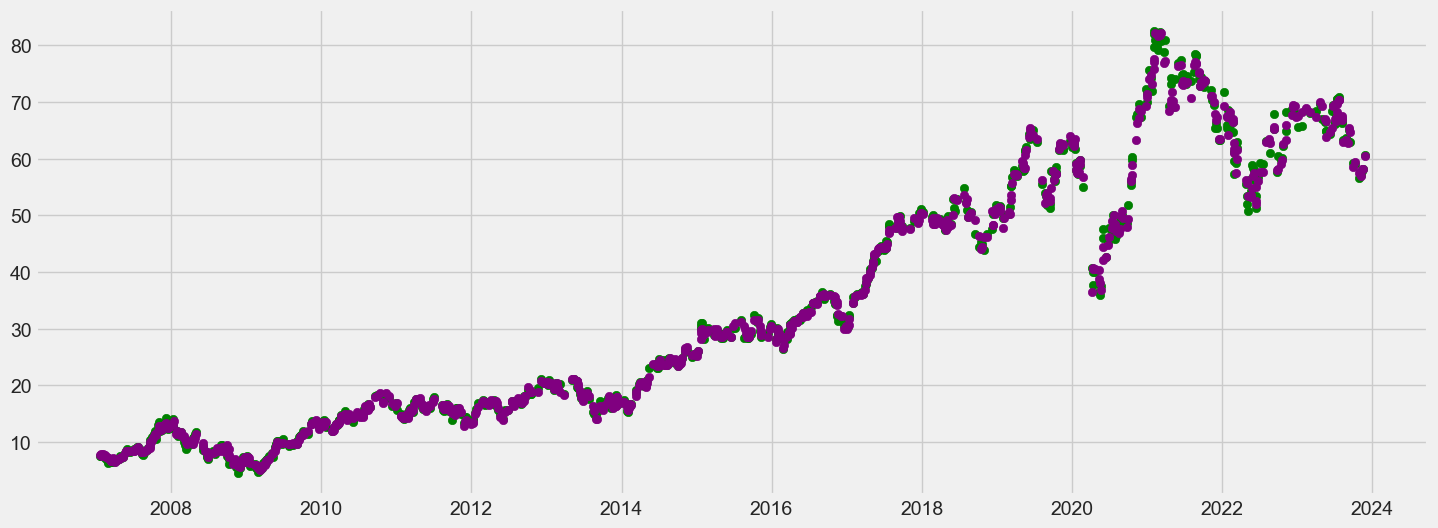

In [23]:
plt.figure(figsize=(16,6))
plt.scatter(valid.index, valid['actual'], c = "green")
plt.scatter(valid.index, valid['pred'], c = "purple")

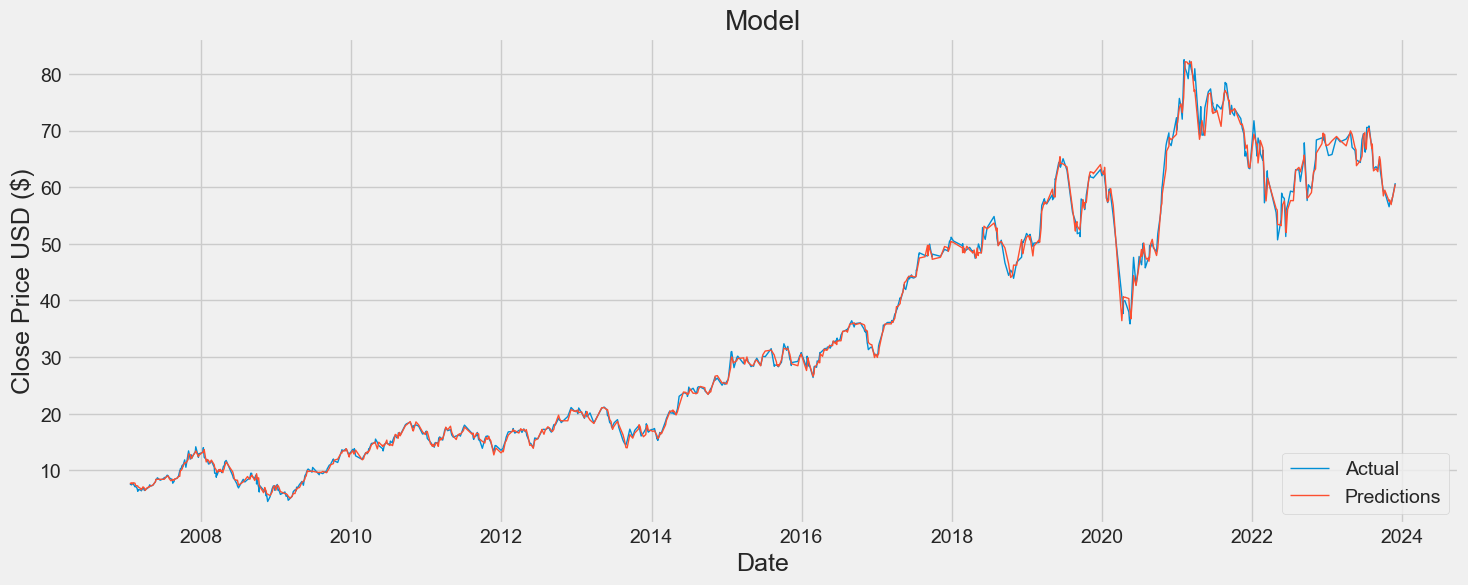

In [25]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['Close'], linewidth="1")
plt.plot(valid[['actual', 'pred']], linewidth="1")
plt.legend(['Actual','Predictions'], loc='lower right')
plt.show()

In [61]:
last_data_point = X.iloc[-1].tolist()
last_data_point

[60.54999923706055,
 59.349998474121094,
 58.88999938964844,
 59.5,
 58.63999938964844]

In [62]:
next5_pred = []

In [63]:
for i in range(5):
    # Predict the next day
    next_day_prediction = knn.predict([last_data_point])[0]  # Make the prediction

    # Add prediction to the list
    next5_pred.append(next_day_prediction)

    # Update last_data_point for the next prediction
    # Shift the lagged close prices and insert the predicted close price
    last_data_point = last_data_point[1:6] + [next_day_prediction] + last_data_point[7:]

print(f'5-day Forecast: {next5_pred}')

5-day Forecast: [81.55923051100511, 81.55923051100511, 81.55923051100511, 81.69307650052585, 81.55923051100511]


In [65]:
valid

,actual,pred
Date,,
2007-01-18,7.517000,7.749846
2007-01-22,7.589000,7.720231
2007-01-26,7.453000,7.830538
2007-01-30,7.632000,7.591000
2007-02-02,7.730000,7.835846
...,...,...
2023-11-03,57.279999,57.735384
2023-11-10,57.180000,56.918846
2023-11-15,57.790001,58.149999


In [70]:
forcsv = pd.DataFrame(valid["pred"])
forcsv.rename(columns = {'pred':'knn'}, inplace = True)
forcsv

,knn
Date,
2007-01-18,7.749846
2007-01-22,7.720231
2007-01-26,7.830538
2007-01-30,7.591000
2007-02-02,7.835846
...,...
2023-11-03,57.735384
2023-11-10,56.918846
2023-11-15,58.149999


In [71]:
forcsv.to_csv("knn.csv")